# **DATA**

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# data shape
df.shape

(5572, 5)

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# renaming the features
df.rename(columns={"v1":"target", "v2":"sms"},inplace=True)

In [6]:
# encode the target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df["target"]=encoder.fit_transform(df["target"])    # 0-ham , 1-spam

# **FEATURE EXTRACTION**

In [7]:
# nltk library for nlp

import nltk
nltk.download("punkt_tab")
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# num_characters feature using the number of features in one sms
df["num_characters"]=df['sms'].apply(len)

In [9]:
# num_words feature using number of words per sms
df["num_words"]=df["sms"].apply(lambda x:len(nltk.word_tokenize(x)))

In [10]:
# num_sentences feature using the number of sentences per sms
df["num_sentences"]=df["sms"].apply(lambda x: len(nltk.sent_tokenize(x)))

# **DATA CLEANING**

In [11]:
# null values
df.isnull().sum()

,0
target,0
sms,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566
num_characters,0
num_words,0
num_sentences,0


In [12]:
# drop the last three columns due to mostly null values
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [13]:
# duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
# drop the duplicated values
df=df.drop_duplicates(keep="first")

In [15]:
# outliers
upper_limit=df['num_characters'].quantile(0.99)
lower_limit=df['num_characters'].quantile(0.01)

df=df[(df["num_characters"]<upper_limit) & (df["num_characters"]>lower_limit)]

In [16]:
df.head()

,target,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# **EDA**

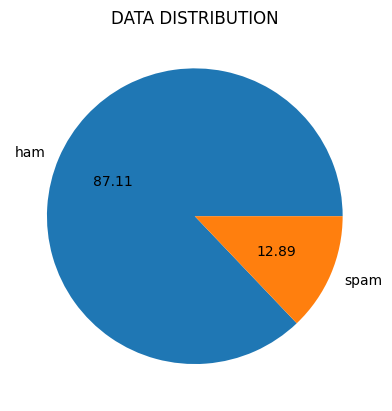

In [17]:
# Data Distribution
import matplotlib.pyplot as plt
plt.title("DATA DISTRIBUTION")
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

**Imbalance Data**

**So Accuracy is not a relaible measure.**

In [18]:
df.columns

Index(['target', 'sms', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

<Axes: >

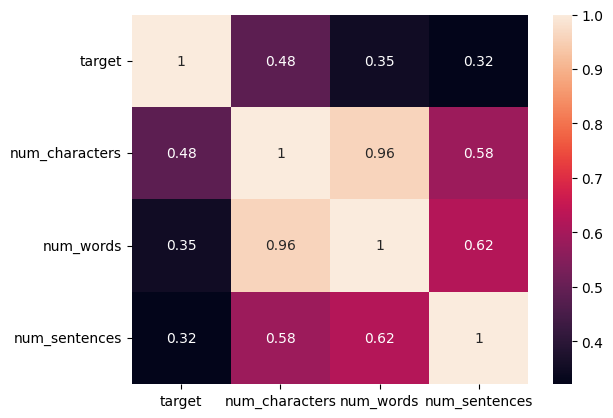

In [19]:
# Correalation Heat Map
import seaborn as sns
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

**Multi Coleniarity in data.**


**So among the extracted features, we will only use num_characters because it has the highest correlation with target feature. (0.48)**

In [20]:
# Statistics of ham
df[df["target"]==0][['target', 'sms', 'num_characters', 'num_words', 'num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,4406.0,4406.000000,4406.000000,4406.000000
mean,0.0,67.745801,16.459601,1.770540
std,0.0,44.106391,10.387108,1.139829
min,0.0,14.000000,1.000000,1.000000
25%,0.0,34.000000,9.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,89.000000,22.000000,2.000000
max,0.0,263.000000,75.000000,12.000000


In [21]:
# Statistics of spam
df[df["target"]==1][['target', 'sms', 'num_characters', 'num_words', 'num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,652.0,652.000000,652.000000,652.000000
mean,1.0,138.082822,27.707055,2.973926
std,0.0,29.760424,6.941167,1.487561
min,1.0,18.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

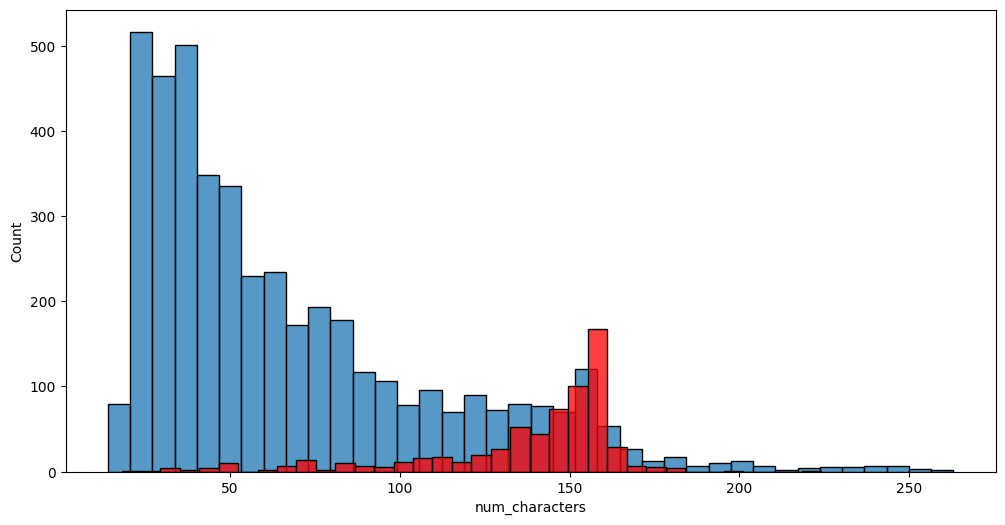

In [22]:
# histplot of ham and spam  num_characters
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

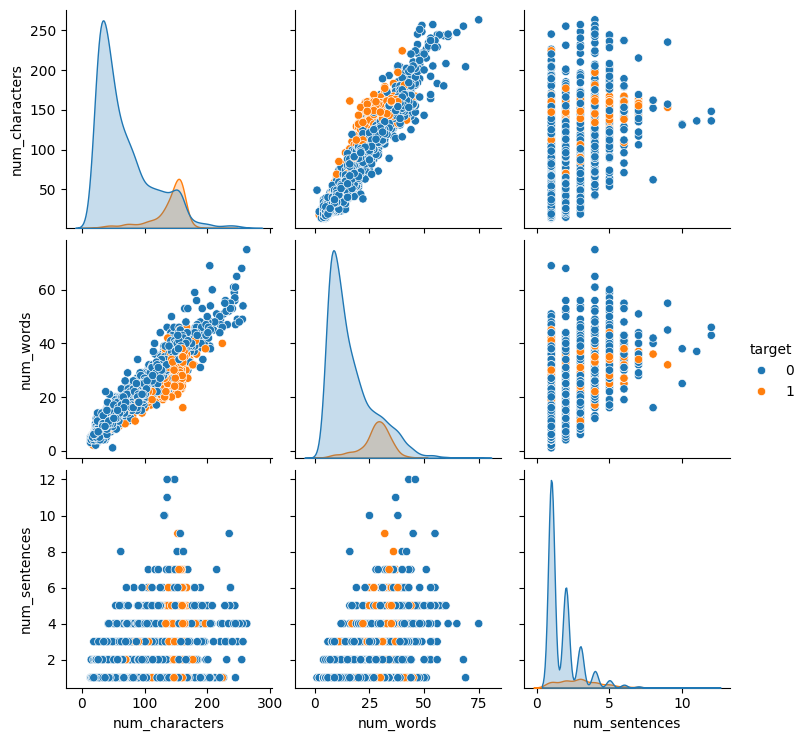

In [23]:
sns.pairplot(df,hue="target")

In [24]:
# Word Cloud for ham and spam
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10,background_color="black")

In [25]:
spam_wc= wc.generate(df[df["target"]==1]["sms"].str.cat(sep=" "))

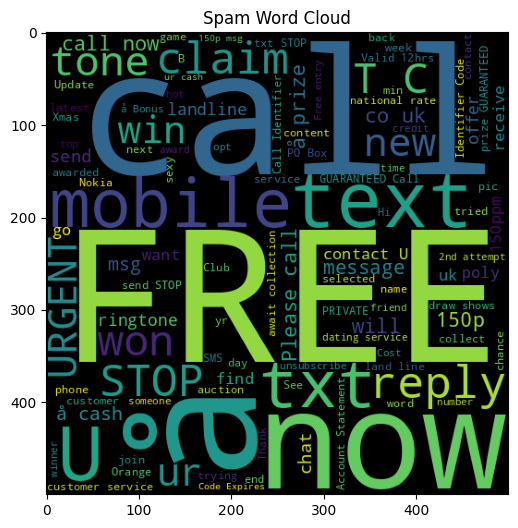

In [26]:
plt.figure(figsize=(10,6))
plt.title("Spam Word Cloud")
plt.imshow(spam_wc)

In [27]:
ham_wc= wc.generate(df[df["target"]==0]["sms"].str.cat(sep=" "))

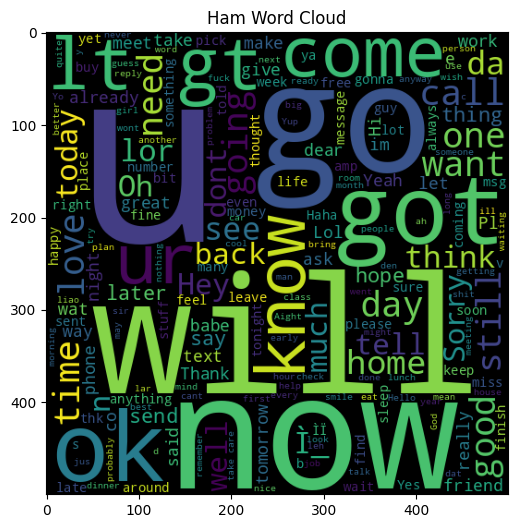

In [28]:
plt.figure(figsize=(10,6))
plt.title("Ham Word Cloud")
plt.imshow(ham_wc)

# **DATA PREPROCESSING**




**PipeLine**
1.   Lower Case
2.   Tokenization
3.   Removing Special Characters
4.   Removing Stop words and punctuations
5.   Stemming

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
import string

# function for pipeline
def transform_text(text):

  # lower case
  text=text.lower()

  # word tokenize
  text=nltk.word_tokenize(text)

  # removing special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  # removing stop words and special char
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  # stemming
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [31]:
from nltk.corpus import stopwords

# creating a column with transformed text
df["transformed_text"]=df["sms"].apply(transform_text)

# **DATA PREPARATION**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorizer Object
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

# vectorize the the sms feature
X=tfidf.fit_transform(df['sms']).toarray()
y=df['target'].values

# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# **MODEL SELECTION**

In [33]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'BgC': bc,
    'xgb':xgb
}

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# model training
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    return accuracy,precision,recall,f1

accuracy_scores = []
precision_scores = []
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("f1 - ",current_f1)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9851778656126482
Precision -  0.963302752293578
Recall -  0.9051724137931034
f1 -  0.9333333333333333
For  KN
Accuracy -  0.967391304347826
Precision -  1.0
Recall -  0.7155172413793104
f1 -  0.8341708542713567
For  NB
Accuracy -  0.9822134387351779
Precision -  0.99
Recall -  0.853448275862069
f1 -  0.9166666666666666
For  DT
Accuracy -  0.9594861660079052
Precision -  0.8947368421052632
Recall -  0.7327586206896551
f1 -  0.8056872037914692
For  LR
Accuracy -  0.9693675889328063
Precision -  0.912621359223301
Recall -  0.8103448275862069
f1 -  0.8584474885844748
For  RF
Accuracy -  0.9841897233201581
Precision -  1.0
Recall -  0.8620689655172413
f1 -  0.9259259259259259
For  BgC
Accuracy -  0.9822134387351779
Precision -  0.9537037037037037
Recall -  0.8879310344827587
f1 -  0.9196428571428571
For  xgb
Accuracy -  0.983201581027668
Precision -  0.9714285714285714
Recall -  0.8793103448275862
f1 -  0.9230769230769231


In [35]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(rfc,open("model.pkl","wb"))